In [1]:
import os
import tempfile

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import plotnine as p9
import anndata
import scanpy as sc
import scvi
import seaborn as sns
import torch
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
import scipy.sparse as sp # for sparse matrix

# Set random seeds for reproducibility
torch.manual_seed(42)
np.random.seed(42)

/home/dhakal/anaconda3/envs/URT_NSCL/lib/python3.12/site-packages/anndata/utils.py:429: FutureWarning: Importing read_csv from `anndata` is deprecated. Import anndata.io.read_csv instead.
/home/dhakal/anaconda3/envs/URT_NSCL/lib/python3.12/site-packages/anndata/utils.py:429: FutureWarning: Importing read_loom from `anndata` is deprecated. Import anndata.io.read_loom instead.
/home/dhakal/anaconda3/envs/URT_NSCL/lib/python3.12/site-packages/anndata/utils.py:429: FutureWarning: Importing read_text from `anndata` is deprecated. Import anndata.io.read_text instead.
/home/dhakal/anaconda3/envs/URT_NSCL/lib/python3.12/site-packages/anndata/utils.py:429: FutureWarning: Importing CSCDataset from `anndata.experimental` is deprecated. Import anndata.abc.CSCDataset instead.
/home/dhakal/anaconda3/envs/URT_NSCL/lib/python3.12/site-packages/anndata/utils.py:429: FutureWarning: Importing CSRDataset from `anndata.experimental` is deprecated. Import anndata.abc.CSRDataset instead.
/home/dhakal/anacond

In [2]:
scvi.settings.seed = 42
print("Last run with scvi-tools version:", scvi.__version__)

Seed set to 42


Last run with scvi-tools version: 1.2.0


In [3]:
sc.set_figure_params(figsize=(6, 6), frameon=False)
sns.set_theme()
torch.set_float32_matmul_precision("high")
save_dir = tempfile.TemporaryDirectory()

%config InlineBackend.print_figure_kwargs={"facecolor": "w"}
%config InlineBackend.figure_format="retina"

In [4]:
adata = sc.read_h5ad("raw-count-full-genes-with-cell-type-annotation.h5ad")

In [5]:
level1 = set(adata.obs[('level1')].values)
level2 = set(adata.obs[('level2')].values)
level3 = set(adata.obs[('level3')].values)

In [11]:
print(f"Level 1: {level1}")
print(f"Level 2: {level2}")
print(f"Level 3: {level3}")

Level 1: {'Fibroblast', 'Endothelial', 'Smooth muscle', 'Myeloid', 'Lymphoid', 'Epithelial'}
Level 2: {'Monocytes', nan, 'B_naive', 'pDC', 'Basal', 'Mast', 'DC', 'CD8_T', 'Glandular_SS', 'Ionocyte', 'VS', 'CD8_TRM', 'CD16_NK', 'Myoepithelium_SB', 'B_memory', 'Endo(others)', 'Capilary', 'CD4_T', 'ILC', 'Lymphatic', 'Goblet', 'NK', 'Glandular_SM', 'CD4_Treg', 'Ciliated', 'B_plasma', 'CD8_TEMRA', 'Macrophages', 'Basal_SB', 'Artery', 'Glandular_SD'}
Level 3: {'Monocytes', nan, 'B_naive', 'pDC', 'Mac_OLR1', 'Mac_RNASE1', 'B_plasma_a', 'Mast', 'DC', 'CD8_T', 'Mac_SLPI', 'Mac_TMSB4X', 'Mac_ZBTB20', 'Mac_CCL3', 'Mac_C3', 'CD16_NK', 'CD8_TRM', 'Mac_FCN1', 'B_memory', 'CD4_T', 'ILC', 'Mac_APOE', 'NK', 'CD4_Treg', 'CD8_TEMRA', 'B_plasma_b'}


In [12]:
coredata = sc.read_h5ad("cell_atlas_of_the_human_lung_in_health_and_disease_core.h5ad")

In [13]:
print(coredata)

AnnData object with n_obs × n_vars = 584944 × 27957
    obs: 'suspension_type', 'donor_id', 'is_primary_data', 'assay_ontology_term_id', 'cell_type_ontology_term_id', 'development_stage_ontology_term_id', 'disease_ontology_term_id', 'self_reported_ethnicity_ontology_term_id', 'tissue_ontology_term_id', 'organism_ontology_term_id', 'sex_ontology_term_id', 'BMI', 'age_or_mean_of_age_range', 'age_range', 'anatomical_region_ccf_score', 'ann_coarse_for_GWAS_and_modeling', 'ann_finest_level', 'ann_level_1', 'ann_level_2', 'ann_level_3', 'ann_level_4', 'ann_level_5', 'cause_of_death', 'dataset', 'entropy_dataset_leiden_3', 'entropy_original_ann_level_1_leiden_3', 'entropy_original_ann_level_2_clean_leiden_3', 'entropy_original_ann_level_3_clean_leiden_3', 'entropy_subject_ID_leiden_3', 'fresh_or_frozen', 'leiden_1', 'leiden_2', 'leiden_3', 'leiden_4', 'leiden_5', 'log10_total_counts', 'lung_condition', 'mixed_ancestry', 'n_genes_detected', 'original_ann_highest_res', 'original_ann_level_1', '

In [18]:
level1 = set(coredata.obs[('ann_level_1')].values)
level2 = set(coredata.obs[('ann_level_2')].values)
level3 = set(coredata.obs[('ann_level_3')].values)
level4 = set(coredata.obs[('ann_level_4')].values)
level5 = set(coredata.obs[('ann_level_5')].values)

In [19]:
print(f"Level 1: {level1}")
print(f"Level 2: {level2}")
print(f"Level 3: {level3}")
print(f"Level 4: {level4}")
print(f"Level 5: {level5}")

Level 1: {'Stroma', 'Immune', 'Endothelial', 'Epithelial'}
Level 2: {'Alveolar epithelium', 'Hematopoietic stem cells', 'Submucosal Gland', 'Smooth muscle', 'Myeloid', 'Airway epithelium', 'Fibroblast lineage', 'Blood vessels', 'Lymphoid', 'Mesothelium', 'Lymphatic EC'}
Level 3: {'Monocytes', 'Mast cells', 'Basal', 'Submucosal Secretory', 'Dendritic cells', 'Secretory', 'T cell lineage', 'EC capillary', 'AT2', 'EC venous', 'Fibroblasts', 'Lymphatic EC differentiating', 'AT1', 'SM activated stress response', 'Multiciliated lineage', 'Lymphatic EC proliferating', 'B cell lineage', 'Rare', 'Myofibroblasts', 'Innate lymphoid cell NK', 'Smooth muscle FAM83D+', 'None', 'EC arterial', 'Lymphatic EC mature', 'Macrophages'}
Level 4: {'CD8 T cells', 'EC venous pulmonary', 'T cells proliferating', 'Transitional Club-AT2', 'Non-classical monocytes', 'Multiciliated', 'Interstitial macrophages', 'AT2 proliferating', 'Plasmacytoid DCs', 'Subpleural fibroblasts', 'DC2', 'Adventitial fibroblasts', 'SMG

In [20]:
# Set up GPU environment
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
print(f"Using device: {device}")

# List available GPUs
if device.type == 'cuda':
    print("Number of GPUs:", torch.cuda.device_count())
    print("Current GPU:", torch.cuda.get_device_name(0))
    torch.cuda.set_device(1)

Using device: cuda
Number of GPUs: 8
Current GPU: NVIDIA TITAN Xp


In [31]:
def prepare_raw_data(adata):
    """
    Prepare raw count data for scVI analysis
    
    Parameters:
    -----------
    adata : AnnData
        Input single-cell RNA-seq data with raw counts in 'raw' layer
    
    Returns:
    --------
    AnnData
        Preprocessed data ready for scVI
    """
    # Create a copy of the AnnData object
    adata_prep = adata.copy()
    
    # Switch to raw counts layer
    adata_prep.X = adata_prep.layers['raw'].copy()
    
    # 1. Quality Control
    # Calculate QC metrics
    sc.pp.calculate_qc_metrics(
        adata_prep, 
        percent_top=None, 
        log1p=False, 
        inplace=True
    )
    
    # Identify mitochondrial genes
    adata_prep.var['mt'] = adata_prep.var_names.str.startswith('MT-')
    
    # Filter cells
    sc.pp.filter_cells(adata_prep, min_genes=200)
    sc.pp.filter_genes(adata_prep, min_cells=3)
    
    # Filter out high mitochondrial content cells
    adata_prep = adata_prep[adata_prep.obs['pct_counts_mt'] < 20, :]
    
    return adata_prep

In [32]:
def normalize_and_select_features(adata, n_top_genes=2000):
    """
    Normalize data and select highly variable genes
    
    Parameters:
    -----------
    adata : AnnData
        Preprocessed single-cell RNA-seq data
    n_top_genes : int, optional
        Number of top genes to select
    
    Returns:
    --------
    AnnData
        Normalized data with selected features
    """
    # Create a copy
    adata_norm = adata.copy()
    
    # Normalize total counts
    sc.pp.normalize_total(adata_norm, target_sum=1e4)
    
    # Log transformation
    sc.pp.log1p(adata_norm)
    
    # Select highly variable genes
    sc.pp.highly_variable_genes(
        adata_norm, 
        min_mean=0.0125, 
        max_mean=3, 
        min_disp=0.5,
        n_top_genes=n_top_genes
    )
    
    # Subset to highly variable genes
    return adata_norm[:, adata_norm.var['highly_variable']]

In [65]:
def prepare_scvi_model(adata):
    adata_scvi = adata.copy()
   
    # Debug print statements
    print("Columns in AnnData object:")
    print(adata_scvi.obs.columns)
    print("\nColumn types:")
    for col in adata_scvi.obs.columns:
        print(f"{col}: {adata_scvi.obs[col].dtype}")
   
    # Prepare categorical and batch keys
    batch_key = None
    categorical_keys = []
   
    # Check for potential batch key
    potential_batch_keys = ['sample_batch', 'batch', 'technology']
    for key in potential_batch_keys:
        if key in adata_scvi.obs.columns:
            batch_key = key
            break
   
    # Explicitly handle categorical columns
    for col in adata_scvi.obs.columns:
        if adata_scvi.obs[col].dtype == 'object' or adata_scvi.obs[col].dtype.name == 'category':
            try:
                # Force conversion to category with existing unique values
                unique_values = adata_scvi.obs[col].unique()
                adata_scvi.obs[col] = pd.Categorical(adata_scvi.obs[col], categories=unique_values)
                
                if len(adata_scvi.obs[col].unique()) < len(adata_scvi.obs[col]) * 0.5:
                    categorical_keys.append(col)
            except Exception as e:
                print(f"Could not convert {col} to category: {e}")
                continue
   
    # Validate keys
    if batch_key and adata_scvi.obs[batch_key].dtype.name != 'category':
        adata_scvi.obs[batch_key] = adata_scvi.obs[batch_key].astype('category')
    
    valid_categorical_keys = [
        key for key in categorical_keys
        if len(adata_scvi.obs[key].cat.categories) < len(adata_scvi) * 0.5
    ]
   
    layer_key = 'raw' if 'raw' in adata_scvi.layers else None
    continuous_covariate_keys = ['n_counts'] if 'n_counts' in adata_scvi.obs.columns else None
   
    # Debug prints
    print("\nBatch key:", batch_key)
    print("Categorical keys:", valid_categorical_keys)
    print("Continuous keys:", continuous_covariate_keys)
    print("Layer key:", layer_key)
   
    # Setup for scVI
    scvi.model.SCVI.setup_anndata(
        adata_scvi,
        layer=layer_key,
        batch_key=batch_key,
        categorical_covariate_keys=valid_categorical_keys,
        continuous_covariate_keys=continuous_covariate_keys,
    )
   
    return adata_scvi

In [66]:
def train_scvi_model_gpu(adata):
    """
    Train scVI model 
    dispersion='gene':Gene-level overdispersion (gene_expression across cells)
    dispersion='constant' :assumes that the dispersion is the same across all genes. 
    That is, all genes are assumed to have the same level of variability
    """
    # Model configuration for GPU training
    model = scvi.model.SCVI(
        adata,
        n_layers=2,
        n_latent=30,
        dispersion='gene' 
    )
    
    # Train with GPU-specific parameters
    model.train(
        max_epochs=300,            # Increased epochs
        early_stopping=True,       # Prevent overfitting
        early_stopping_patience=20,# Wait 20 epochs before stopping
        batch_size=256,            # Larger batch size for GPU
        plan_kwargs={
            'lr': 1e-3,            # Learning rate
            'weight_decay': 1e-4   # L2 regularization
        }
    )
    
    return model

In [67]:
# Visualize results
def visualize_scvi_results(adata):
    # Compute UMAP
    sc.pp.neighbors(adata, use_rep='X_scvi')
    sc.tl.umap(adata)
    
    # Prepare visualization
    plt.figure(figsize=(20, 15))
    
    # Find appropriate columns for visualization
    plot_columns = [col for col in adata.obs.columns 
                    if adata.obs[col].dtype.name == 'category' 
                    and len(adata.obs[col].unique()) < 20]
    
    # Plot available categorical columns
    for i, col in enumerate(plot_columns[:4], 1):
        if i > 4:  # Limit to 4 subplots
            break
        plt.subplot(2, 2, i)
        sc.pl.umap(
            adata, 
            color=col, 
            title=f'UMAP colored by {col}',
            show=False
        )
    
    plt.tight_layout()
    plt.savefig('scvi_umap_gpu.png', dpi=300)
    plt.close()

In [56]:
# Prepare raw data
adata_qc = prepare_raw_data(adata)
print("Raw data preparation completed")

Raw data preparation completed


In [57]:
# Normalize and select features
adata_norm = normalize_and_select_features(adata_qc)
print("Data normalized and features selected successfully")

Data normalized and features selected successfully


In [68]:
# Prepare for scVI
adata_scvi = prepare_scvi_model(adata_norm)
print("Data prepared for scVI successfully")


Columns in AnnData object:
Index(['sample_batch', 'initial_size_unspliced', 'initial_size_spliced',
       'initial_size', 'dataset', 'n_genes_by_counts',
       'log1p_n_genes_by_counts', 'total_counts', 'log1p_total_counts',
       'total_counts_mt', 'log1p_total_counts_mt', 'pct_counts_mt',
       'doublet_scores', 'predicted_doublets', 'n_counts', 'n_genes',
       'sample description', 'experiment', 'patient', 'level1', 'level2',
       'level3', 'sample'],
      dtype='object')

Column types:
sample_batch: category
initial_size_unspliced: uint64
initial_size_spliced: uint64
initial_size: float32
dataset: category
n_genes_by_counts: int32
log1p_n_genes_by_counts: float64
total_counts: float32
log1p_total_counts: float32
total_counts_mt: float32
log1p_total_counts_mt: float32
pct_counts_mt: float32
doublet_scores: float64
predicted_doublets: category
n_counts: float32
n_genes: int64
sample description: category
experiment: category
patient: category
level1: category
level2: categor

In [69]:
# Train model on GPU
scvi_model = train_scvi_model_gpu(adata_scvi)
print("scVI model training completed")

Trainer will use only 1 of 8 GPUs because it is running inside an interactive / notebook environment. You may try to set `Trainer(devices=8)` but please note that multi-GPU inside interactive / notebook environments is considered experimental and unstable. Your mileage may vary.
GPU available: True (cuda), used: True
TPU available: False, using: 0 TPU cores
HPU available: False, using: 0 HPUs
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0,1,2,3,4,5,6,7]
/home/dhakal/anaconda3/envs/URT_NSCL/lib/python3.12/site-packages/lightning/pytorch/trainer/connectors/data_connector.py:424: The 'train_dataloader' does not have many workers which may be a bottleneck. Consider increasing the value of the `num_workers` argument` to `num_workers=39` in the `DataLoader` to improve performance.
/home/dhakal/anaconda3/envs/URT_NSCL/lib/python3.12/site-packages/lightning/pytorch/trainer/connectors/data_connector.py:424: The 'val_dataloader' does not have many workers which may be a bottleneck. Consider increasing

Epoch 158/300:  53%|█████▎    | 158/300 [15:48<14:12,  6.00s/it, v_num=1, train_loss_step=308, train_loss_epoch=318]
Monitored metric elbo_validation did not improve in the last 20 records. Best score: 329.660. Signaling Trainer to stop.
scVI model training completed


In [70]:
# Get latent representation
latent = scvi_model.get_latent_representation()
adata_scvi.obsm['X_scvi'] = latent

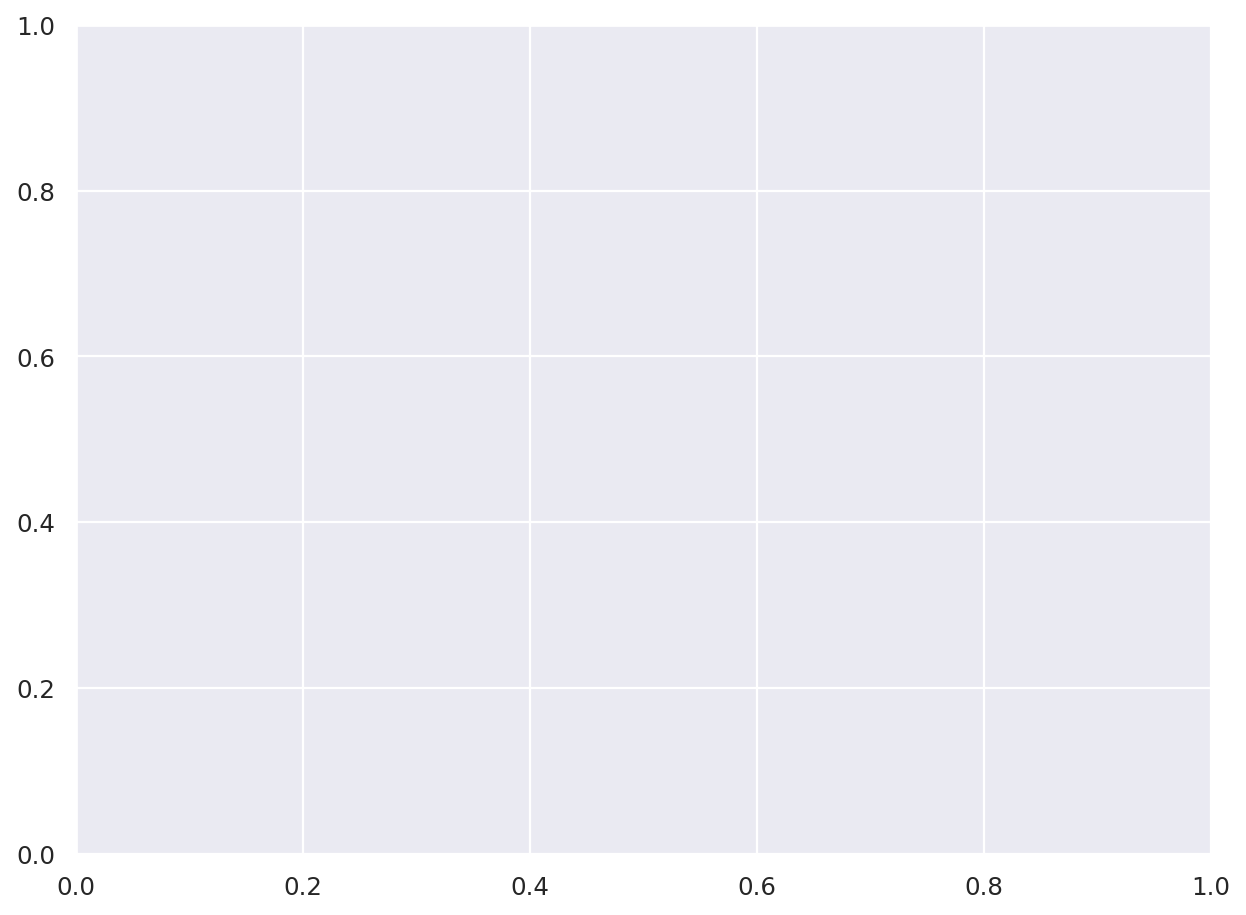

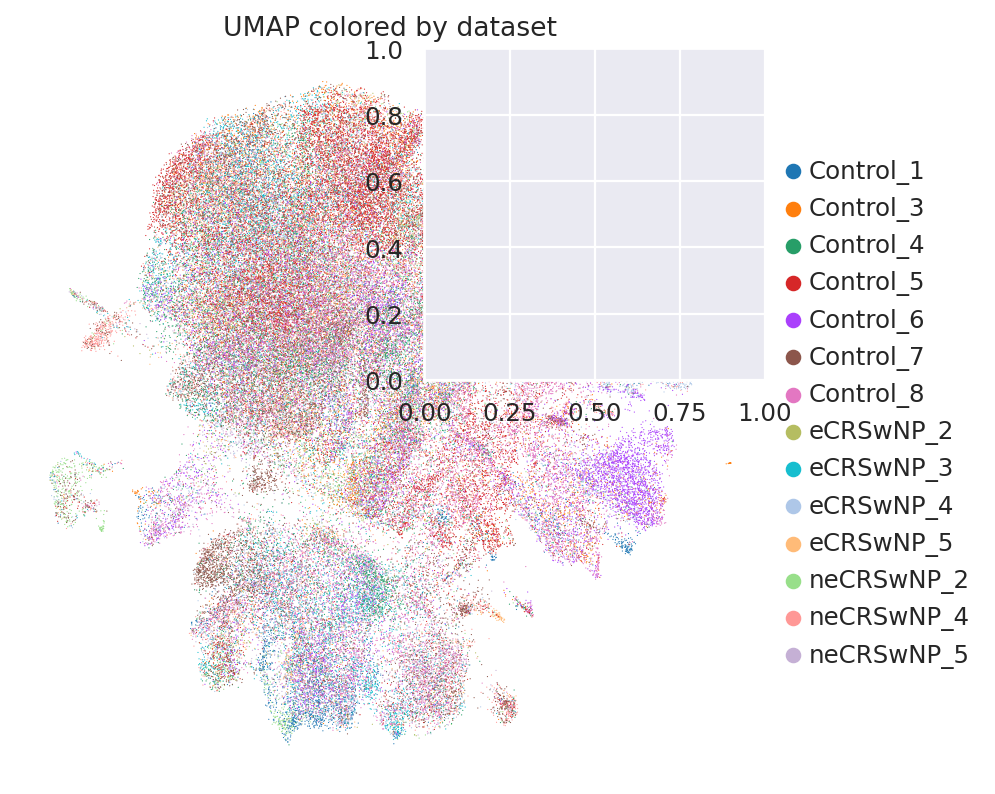

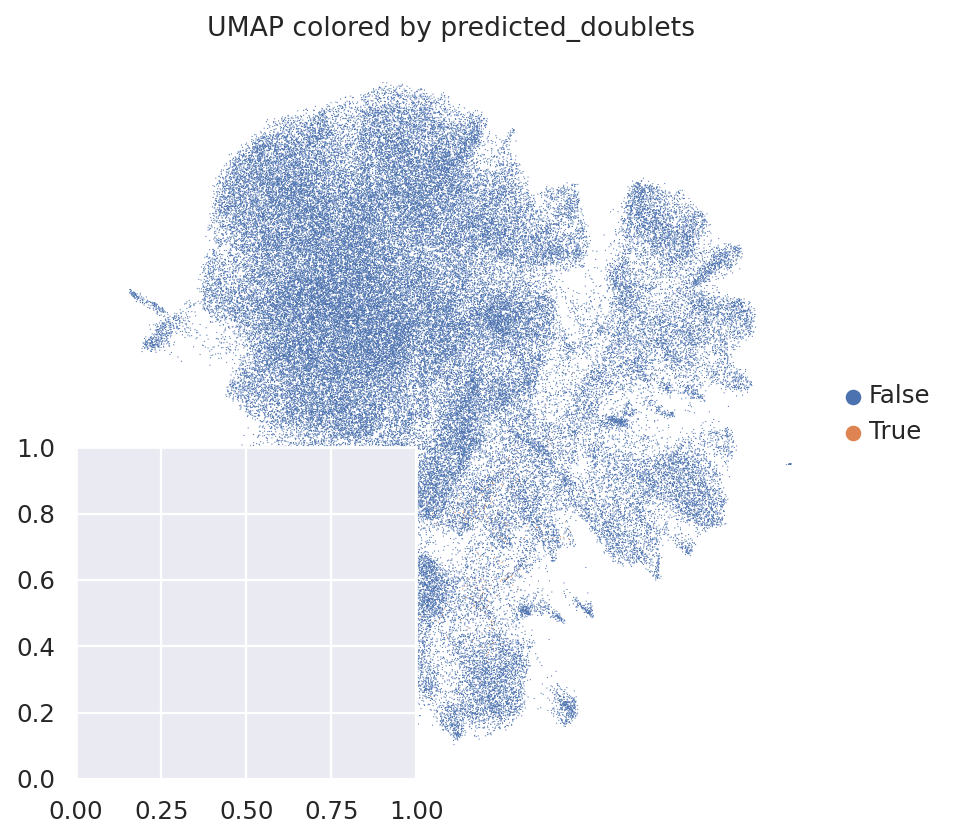

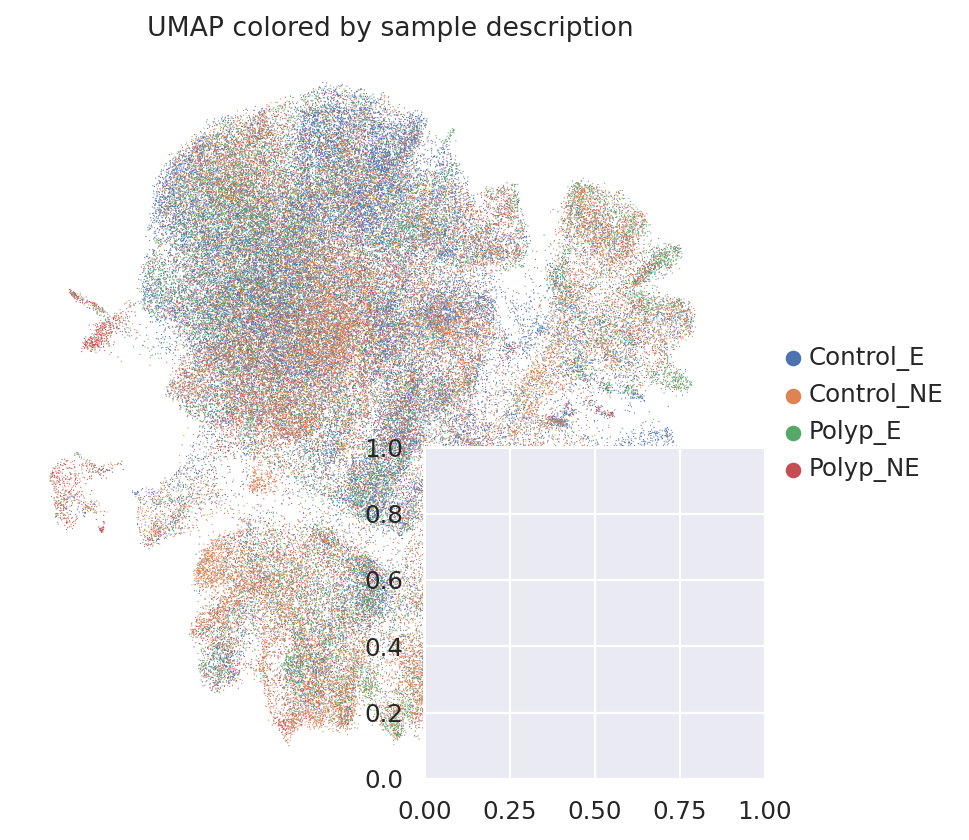

In [71]:
# Visualize results
visualize_scvi_results(adata_scvi)

In [72]:
# Plot training loss
plt.figure(figsize=(10, 5))
plt.plot(scvi_model.history['elbo_train'], label='Training Loss')
plt.plot(scvi_model.history['elbo_validation'], label='Validation Loss')
plt.title('ScVI Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Evidence Lower Bound (ELBO)')
plt.legend()
plt.tight_layout()
plt.savefig('scvi_loss_curve.png')
plt.close()

In [79]:
# Access the weights of the px_r_decoder or px_dropout_decoder
gene_params = scvi_model.module.decoder.px_r_decoder.weight.detach().cpu().numpy()  # or px_dropout_decoder

# Calculate feature importance based on the absolute magnitude of loadings
feature_importance = np.abs(gene_params).mean(axis=1)

# Sort features by importance
top_features_indices = feature_importance.argsort()[::-1]
top_features_names = adata_scvi.var_names[top_features_indices]

# Plot top 20 most important features
plt.figure(figsize=(12, 6))
plt.bar(range(20), feature_importance[top_features_indices[:20]])
plt.xticks(range(20), top_features_names[:20], rotation=90)
plt.title('Top 20 Most Important Features')
plt.xlabel('Genes')
plt.ylabel('Importance Score')
plt.tight_layout()
plt.savefig('scvi_feature_importance.png')
plt.close()

# Print top 20 most important features
print("Top 20 Most Important Features:")
for i, (name, importance) in enumerate(zip(top_features_names[:20], feature_importance[top_features_indices[:20]]), 1):
    print(f"{i}. {name}: {importance}")


Top 20 Most Important Features:
1. AC138207.1: 0.052060566842556
2. AL590068.2: 0.05197988450527191
3. ANKRD36C: 0.05140136927366257
4. IGLV2-11: 0.050941456109285355
5. LINC01866: 0.05091995745897293
6. NETO2: 0.05075251683592796
7. C1QC: 0.050694361329078674
8. AC093898.1: 0.050554968416690826
9. PIP: 0.05043710768222809
10. PLP1: 0.05021583288908005
11. RYR2: 0.050181347876787186
12. AC007497.2: 0.05013477802276611
13. SUCNR1: 0.0501326322555542
14. AC007952.4: 0.05005894601345062
15. FAM162B: 0.050035104155540466
16. IGKV2-29: 0.05002453178167343
17. LINC00052: 0.04990249499678612
18. TRAJ42: 0.04986817389726639
19. CTNNA2: 0.049828846007585526
20. IGKV1D-12: 0.04979783296585083


In [78]:
# Inspect the decoder structure
print(scvi_model.module.decoder)


DecoderSCVI(
  (px_decoder): FCLayers(
    (fc_layers): Sequential(
      (Layer 0): Sequential(
        (0): Linear(in_features=582, out_features=128, bias=True)
        (1): BatchNorm1d(128, eps=0.001, momentum=0.01, affine=True, track_running_stats=True)
        (2): None
        (3): ReLU()
        (4): None
      )
      (Layer 1): Sequential(
        (0): Linear(in_features=679, out_features=128, bias=True)
        (1): BatchNorm1d(128, eps=0.001, momentum=0.01, affine=True, track_running_stats=True)
        (2): None
        (3): ReLU()
        (4): None
      )
    )
  )
  (px_scale_decoder): Sequential(
    (0): Linear(in_features=128, out_features=2000, bias=True)
    (1): Softmax(dim=-1)
  )
  (px_r_decoder): Linear(in_features=128, out_features=2000, bias=True)
  (px_dropout_decoder): Linear(in_features=128, out_features=2000, bias=True)
)


In [80]:
def visualize_results(adata):
    # Compute UMAP
    sc.pp.neighbors(adata, use_rep='X_scvi')
    sc.tl.umap(adata)
    
    # Prepare visualization
    plot_columns = [col for col in adata.obs.columns 
                    if adata.obs[col].dtype.name == 'category' 
                    and len(adata.obs[col].unique()) < 20]
    
    # Plot available categorical columns, one plot at a time
    for col in plot_columns[:4]:  # Limit to 4 columns for visualization
        plt.figure(figsize=(10, 8))
        sc.pl.umap(
            adata, 
            color=col, 
            title=f'UMAP colored by {col}',
            show=False
        )
        plt.tight_layout()
        plt.savefig(f'umap_{col}_colored.png', dpi=300)
        plt.close()

    print("UMAP visualizations saved as individual PNG files.")

In [81]:
visualize_results(adata_scvi)

UMAP visualizations saved as individual PNG files.


<Figure size 800x640 with 0 Axes>

<Figure size 800x640 with 0 Axes>

<Figure size 800x640 with 0 Axes>

<Figure size 800x640 with 0 Axes>

In [1]:
level1 = set(adata.obs[('level1')].values)
level2 = set(adata.obs[('level2')].values)
level3 = set(adata.obs[('level3')].values)

NameError: name 'adata' is not defined